**Uploading Data**

In [7]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

file_test = pd.read_csv('Dataset_1_test.csv')
test = file_test.to_numpy()

file_train = pd.read_csv('Dataset_1_train.csv')
train = file_train.to_numpy()

file_valid = pd.read_csv('Dataset_1_valid.csv')
valid = file_valid.to_numpy()
print('Uploaded successfully')

Saving Dataset_1_test.csv to Dataset_1_test (1).csv
Saving Dataset_1_train.csv to Dataset_1_train (1).csv
Saving Dataset_1_valid.csv to Dataset_1_valid (1).csv
Uploaded successfully


# **Linear Regression**
## Task
Analyze the Provided data By Fitting Linear regression model. Calculating the RMSE and Visualizing the plot of Linear Regression.

## Calculating W0 And W1 for Linear Regression

In [8]:

import numpy as np

# Use train data for calculating coefficients
x = np.array(train[:,0])
y = np.array(train[:,1])
n = len(x)
xi = np.sum(x)
yi = np.sum(y)
xi2 = np.sum(x**2)
xiyi = np.sum(x*y)

w1 = (n*xiyi-xi*yi)/(n*xi2-xi**2)
w0 = (yi-w1*xi)/n
print(w0,w1)

-0.9417376147496981 10.856006989188083


## Root Mean Squared Error

### RMSE Function

In [9]:
def RMSE(Y_pred,Y):
    return np.sqrt(np.mean((Y_pred-Y)**2))

### Calculating RMSE

In [10]:
# Assuming x, y, w0, and w1 are already defined (e.g., from cell YcNW43rcPthF)

# Calculate y_pred using w0 and w1 for linear regression
y_pred = w0 + w1 * x

# Calculate and print the RMSE
print("RMSE for Linear Regression:", RMSE(y_pred, y))

RMSE for Linear Regression: 5.43152976578808


## Linear Regression Graph

### Train Data

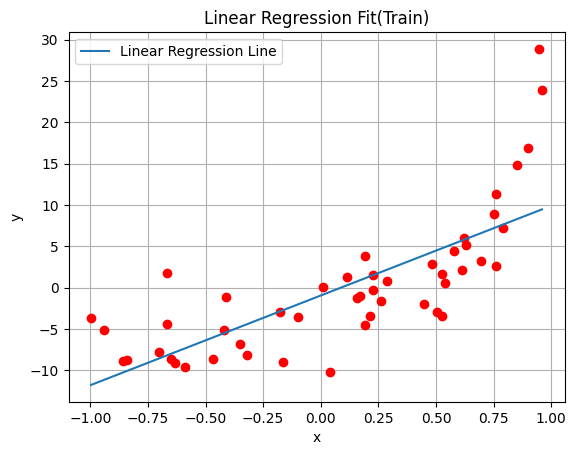

In [11]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for linspace

# Assuming x, y, w0, and w1 are already defined

plt.plot(x,y,'ro')

# Create a range of x-values for the regression line
x_line = np.linspace(np.min(x), np.max(x), 100) # Create 100 points between min and max x

# Calculate the corresponding y-values using the linear regression coefficients
y_line = w0 + w1 * x_line

plt.plot(x_line, y_line, '-', label='Linear Regression Line') # Add a label for the legend

plt.xlabel('x') # Add x-axis label
plt.ylabel('y') # Add y-axis label
plt.title('Linear Regression Fit(Train)') # Add a title
plt.legend() # Add a legend to show the label
plt.grid(True) # Add a grid for better readability
plt.show()

## Comparing Train, Valid and Test Data

### The Plot

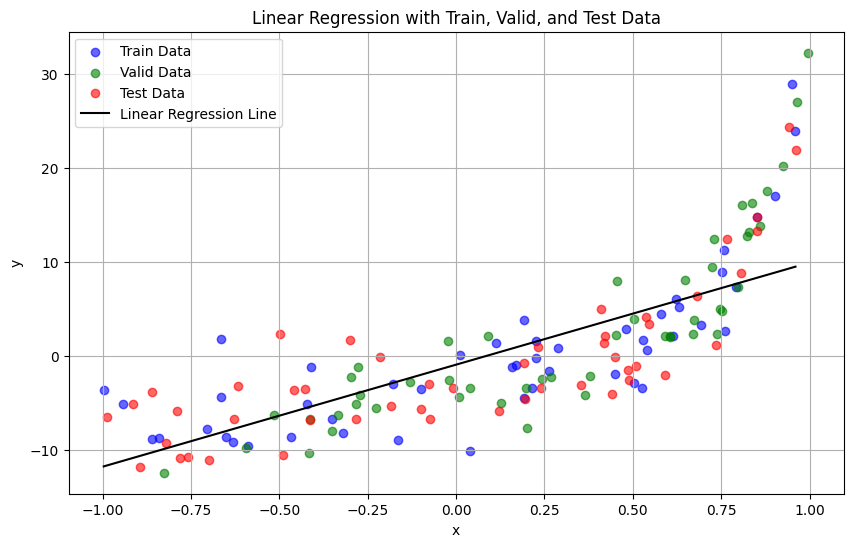

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming train, valid, and test are defined as numpy arrays
# Assuming w0 and w1 are defined from linear regression on train data

x_train = train[:,0]
y_train = train[:,1]

x_valid = valid[:,0]
y_valid = valid[:,1]

x_test = test[:,0]
y_test = test[:,1]

# Create a range of x-values for the regression line
x_line = np.linspace(np.min(x_train), np.max(x_train), 100)

# Calculate the corresponding y-values using the linear regression coefficients
y_line = w0 + w1 * x_line

plt.figure(figsize=(10, 6)) # Create a new figure for better size

plt.scatter(x_train, y_train, color='blue', label='Train Data', alpha=0.6)
plt.scatter(x_valid, y_valid, color='green', label='Valid Data', alpha=0.6)
plt.scatter(x_test, y_test, color='red', label='Test Data', alpha=0.6)
plt.plot(x_line, y_line, color='black', label='Linear Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Train, Valid, and Test Data')
plt.legend()
plt.grid(True)
plt.show()

### RMSE Difference

In [13]:
# Assuming valid and test are defined as numpy arrays
# Assuming w0 and w1 are defined from linear regression on train data
# Assuming RMSE function is defined

x_valid = valid[:,0]
y_valid = valid[:,1]

x_test = test[:,0]
y_test = test[:,1]

# Calculate predicted y-values for valid and test data using linear regression coefficients
y_valid_pred_linear = w0 + w1 * x_valid
y_test_pred_linear = w0 + w1 * x_test

# Calculate RMSE for valid and test data
rmse_valid_linear = RMSE(y_valid_pred_linear, y_valid)
rmse_test_linear = RMSE(y_test_pred_linear, y_test)

# Print the RMSE values
print("RMSE for Linear Regression on Train Data:", RMSE(y_pred, y))
print(f"RMSE for Linear Regression on Validation Data: {rmse_valid_linear}")
print(f"RMSE for Linear Regression on Test Data: {rmse_test_linear}")



RMSE for Linear Regression on Train Data: 5.43152976578808
RMSE for Linear Regression on Validation Data: 5.9292491068151785
RMSE for Linear Regression on Test Data: 5.0852898384254175


# **Polynomial Regression**
## Task
Analyze the provided data by fitting polynomial regression models of degrees 1 through 10. Calculate and compare the Root Mean Squared Error (RMSE) for both the training and validation datasets for each degree. Visualize the RMSE values against the polynomial degree for both datasets to identify the optimal degree that minimizes the validation RMSE.

In [14]:
import numpy as np
from numpy import linalg as la

# Assuming train data (x, y) is already defined (e.g., from cell YcNW43rcPthF)
# Assuming RMSE function is defined (e.g., from cell BAtl7rHYTDi-)

max_degree = 10 # Define the maximum polynomial degree to test
rmse_scores = {} # Dictionary to store RMSE for each degree

x_train = train[:,0]
y_train = train[:,1]
n = len(x_train)

for D in range(1,max_degree + 1):
    # Create the polynomial features matrix X for the current degree
    X_train_poly = np.c_[np.ones(n)]
    for i in range(1, D + 1):
        X_train_poly = np.c_[X_train_poly, x_train**i]

    # Calculate w (coefficients) for the current degree
    # Use pinv for potentially singular matrices (e.g., high degrees)
    w = la.pinv(X_train_poly.T.dot(X_train_poly)).dot(X_train_poly.T).dot(y_train)

    # Calculate y_pred on the training data
    y_train_pred = X_train_poly.dot(w)

    # Calculate RMSE for the current degree
    rmse = RMSE(y_train_pred, y_train)
    rmse_scores[D] = rmse
    print(f"RMSE for polynomial degree {D}: {rmse}")

# You can now use rmse_scores dictionary to analyze or plot the results

RMSE for polynomial degree 1: 5.43152976578808
RMSE for polynomial degree 2: 4.0874272275743015
RMSE for polynomial degree 3: 3.685537862752044
RMSE for polynomial degree 4: 3.1587182717734206
RMSE for polynomial degree 5: 3.0473878647936337
RMSE for polynomial degree 6: 3.013260485381077
RMSE for polynomial degree 7: 2.9798908301503078
RMSE for polynomial degree 8: 2.969875969077349
RMSE for polynomial degree 9: 2.9589803115975943
RMSE for polynomial degree 10: 2.958980231798017


## Calculate RMSE for train and validation data across degrees




In [15]:
import numpy as np
from numpy import linalg as la

# Assuming train and valid data are defined as numpy arrays (e.g., from previous cells)
# Assuming RMSE function is defined (e.g., from cell BAtl7rHYTDi-)

max_degree = 10 # Define the maximum polynomial degree to test
rmse_train_scores = {} # Dictionary to store train RMSE for each degree
rmse_valid_scores = {} # Dictionary to store valid RMSE for each degree

x_train = train[:,0]
y_train = train[:,1]
n_train = len(x_train)

x_valid = valid[:,0]
y_valid = valid[:,1]
n_valid = len(x_valid)


for D in range(1,max_degree + 1):
    # Create the polynomial features matrix X for the current degree (Train Data)
    X_train_poly = np.c_[np.ones(n_train)]
    for i in range(1, D + 1):
        X_train_poly = np.c_[X_train_poly, x_train**i]

    # Calculate w (coefficients) for the current degree using training data
    # Use pinv for potentially singular matrices (e.g., high degrees)
    w = la.pinv(X_train_poly.T.dot(X_train_poly)).dot(X_train_poly.T).dot(y_train)

    # Calculate y_pred on the training data
    y_train_pred = X_train_poly.dot(w)

    # Calculate RMSE for the current degree on training data
    rmse_train = RMSE(y_train_pred, y_train)
    rmse_train_scores[D] = rmse_train

    # Create the polynomial features matrix X for the current degree (Validation Data)
    X_valid_poly = np.c_[np.ones(n_valid)]
    for i in range(1, D + 1):
        X_valid_poly = np.c_[X_valid_poly, x_valid**i]

    # Calculate y_pred on the validation data using coefficients from training data
    y_valid_pred = X_valid_poly.dot(w)

    # Calculate RMSE for the current degree on validation data
    rmse_valid = RMSE(y_valid_pred, y_valid)
    rmse_valid_scores[D] = rmse_valid

    print(f"Polynomial Degree {D}:")
    print(f"  Train RMSE: {rmse_train}")
    print(f"  Validation RMSE: {rmse_valid}")

# You can now use rmse_train_scores and rmse_valid_scores dictionaries for further analysis or plotting

Polynomial Degree 1:
  Train RMSE: 5.43152976578808
  Validation RMSE: 5.9292491068151785
Polynomial Degree 2:
  Train RMSE: 4.0874272275743015
  Validation RMSE: 4.36964029980561
Polynomial Degree 3:
  Train RMSE: 3.685537862752044
  Validation RMSE: 3.6384068964507716
Polynomial Degree 4:
  Train RMSE: 3.1587182717734206
  Validation RMSE: 2.9846830059043366
Polynomial Degree 5:
  Train RMSE: 3.0473878647936337
  Validation RMSE: 3.043433114089473
Polynomial Degree 6:
  Train RMSE: 3.013260485381077
  Validation RMSE: 3.0641636225022175
Polynomial Degree 7:
  Train RMSE: 2.9798908301503078
  Validation RMSE: 3.116549916486826
Polynomial Degree 8:
  Train RMSE: 2.969875969077349
  Validation RMSE: 3.094314194532371
Polynomial Degree 9:
  Train RMSE: 2.9589803115975943
  Validation RMSE: 3.2106501266771694
Polynomial Degree 10:
  Train RMSE: 2.958980231798017
  Validation RMSE: 3.2108768058302526


## Visualize RMSE vs. Degree

### Subtask:
Create a plot showing the RMSE values on the y-axis and the polynomial degree on the x-axis. Plot separate lines for the training and validation RMSE.


**Reasoning**:
Create a plot to visualize the RMSE values for training and validation data against polynomial degree.



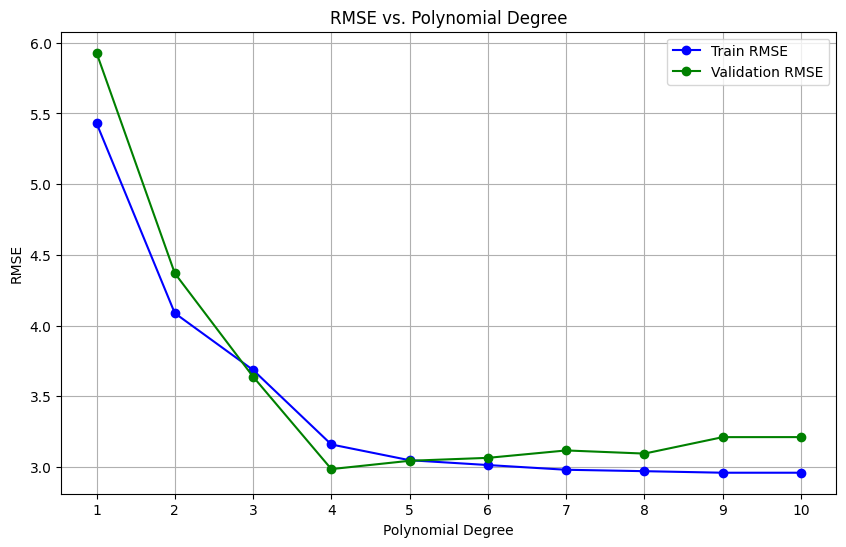

In [16]:
import matplotlib.pyplot as plt

# Assuming rmse_train_scores and rmse_valid_scores are already defined

plt.figure(figsize=(10, 6)) # Create a new figure for better size

# Plot training RMSE
plt.plot(list(rmse_train_scores.keys()), list(rmse_train_scores.values()), color='blue', label='Train RMSE', marker='o')

# Plot validation RMSE
plt.plot(list(rmse_valid_scores.keys()), list(rmse_valid_scores.values()), color='green', label='Validation RMSE', marker='o')

plt.xlabel('Polynomial Degree') # Add x-axis label
plt.ylabel('RMSE') # Add y-axis label
plt.title('RMSE vs. Polynomial Degree') # Add a title
plt.legend() # Add a legend
plt.grid(True) # Add a grid
plt.xticks(list(rmse_train_scores.keys())) # Ensure x-axis ticks are at each degree
plt.show()

## Identify the best degree

### Subtask:
Analyze the plot and the calculated RMSE values to identify the polynomial degree where the validation RMSE is lowest. This degree represents the best trade-off between fitting the training data and generalizing to unseen data.


In [17]:
import numpy as np

# Assuming rmse_valid_scores is already defined

# Find the degree with the minimum validation RMSE
optimal_degree = min(rmse_valid_scores, key=rmse_valid_scores.get)
min_valid_rmse = rmse_valid_scores[optimal_degree]

print(f"The optimal polynomial degree based on validation RMSE is: {optimal_degree}")
print(f"The minimum validation RMSE at this degree is: {min_valid_rmse}")


The optimal polynomial degree based on validation RMSE is: 4
The minimum validation RMSE at this degree is: 2.9846830059043366


## Best Degree Plot

### Make a Plot, visualizing The Best Polynomial Degree



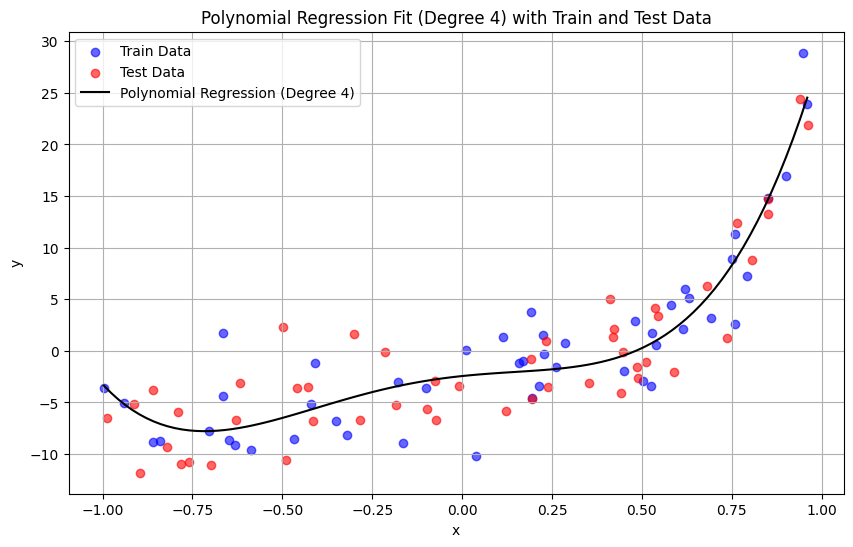

In [18]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy if not already imported

# Assuming x, y (train data), test data, and w are already defined
# Assuming optimal_degree (D) is already determined (e.g., from cell 889ef3c6 or previous analysis)
# Using optimal_degree = 4 based on previous analysis

x_train = train[:,0]
y_train = train[:,1]

x_test = test[:,0]
y_test = test[:,1]

D = 4 # Using the optimal degree found previously

# Recalculate w using the optimal degree D on the training data (if not already done in a previous cell)
x_poly_train = np.c_[np.ones(len(x_train))]
for i in range(1,D+1):
  x_poly_train = np.c_[x_poly_train,x_train**i]
V = np.linalg.inv(np.dot(x_poly_train.T,x_poly_train))
w = np.dot(np.dot(V,x_poly_train.T),y_train)


x_fit = np.linspace(np.min(x_train),np.max(x_train),100) # Generate more points for a smoother line
x_fit_poly = np.c_[np.ones(len(x_fit))]
for i in range(1,D+1):
  x_fit_poly = np.c_[x_fit_poly,x_fit**i]

y_fit = x_fit_poly.dot(w) # Calculate predicted y-values for the fitted line

plt.figure(figsize=(10, 6)) # Create a new figure for better size
plt.scatter(x_train, y_train, color='blue', label='Train Data', alpha=0.6) # Plot the original train data points
plt.scatter(x_test, y_test, color='red', label='Test Data', alpha=0.6) # Plot the original test data points
plt.plot(x_fit,y_fit,'-', color='black', label=f'Polynomial Regression (Degree {D})') # Plot the polynomial fit line

plt.xlabel('x') # Add x-axis label
plt.ylabel('y') # Add y-axis label
plt.title(f'Polynomial Regression Fit (Degree {D}) with Train and Test Data') # Add a title
plt.legend() # Add a legend
plt.grid(True) # Add a grid
plt.show()